In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/Teach_Foundation_of_ML/project/Regression/archive.zip

unzip:  cannot find or open /content/drive/MyDrive/Teach_Foundation_of_ML/project/Regression/archive.zip, /content/drive/MyDrive/Teach_Foundation_of_ML/project/Regression/archive.zip.zip or /content/drive/MyDrive/Teach_Foundation_of_ML/project/Regression/archive.zip.ZIP.


In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Air_Accidents/ICAO_accidents.csv')

In [ ]:
data.head()

,Unnamed: 0,Date,StateOfOccurrence,Location,Model,Registration,Operator,StateOfOperator,StateOfRegistry,FlightPhase,...,InjuryLevel,TypeDesignator,Helicopter,Airplane,Engines,EngineType,Official,OccCats,Risk,Year
0,0,"""2008-01-02T00:00:00.000Z""",PHL,Masbate Airport (MBT),NAMC YS11 A,RP-C3592,Philippines Asian Spirit,PHL,PHL,Landing,...,None,YS11,NaN,True,2,Turboprop,True,"[""RE""]",RS,2008
1,1,"""2008-01-02T00:00:00.000Z""",IRN,Tehran-Mehrabad Airport (THR),FOKKER F27 100,EP-IDB,"Iran, Islamic Republic Of Iran National Airlin...",IRN,IRN,Take-off,...,None,F27,NaN,True,2,Turboprop,True,"[""F-POST"",""ICE""]",OTH,2008
2,2,"""2008-01-03T00:00:00.000Z""",USA,Oklahoma City,PILATUS PC12,N398J,NaN,NaN,USA,Standing,...,Fatal,PC12,False,True,1,Turboprop,NaN,"[""RAMP""]",RS,2008
3,3,"""2008-01-04T00:00:00.000Z""",VEN,A 20 NM del VOR del Gran Roque,LET L410 UVP,YV2081,Venezuela,VEN,VEN,En route,...,Fatal,L410,NaN,True,2,Turboprop,True,"[""SCF-PP""]",SCF,2008
4,4,"""2008-01-05T00:00:00.000Z""",USA,Kodiak,PIPER PA31P 350,N509FN,NaN,NaN,USA,Take-off,...,Fatal,PA47,False,True,1,Jet,NaN,"[""LOC-I"",""SCF-NP""]",LOC-I,2008


In [ ]:
data.tail()

,Unnamed: 0,Date,StateOfOccurrence,Location,Model,Registration,Operator,StateOfOperator,StateOfRegistry,FlightPhase,...,InjuryLevel,TypeDesignator,Helicopter,Airplane,Engines,EngineType,Official,OccCats,Risk,Year
6104,39,"""2022-05-06T00:00:00.000Z""",ITA,Napoli-Capodichino Airport (NAP),Boeing 737-82R (WL),YR-BMM,Blue Air,ROU,ROU,Landing,...,NaN,B38M,False,True,2,Jet,NaN,[],RS,2022
6105,40,"""2022-05-06T00:00:00.000Z""",CHL,Santiago-Arturo Merino Benitez Airport (SCL),Beechcraft 200 Super King Air,CC-CDY,NaN,NaN,CHL,Landing,...,NaN,BE20,False,True,2,Turboprop,NaN,[],RS,2022
6106,41,"""2022-05-11T00:00:00.000Z""",BRA,"Boituva, SP",Cessna 208 Caravan I,PT-OQR,"Skydive4Fun, opf. LBK Servi�o A�reo Especializado",NaN,BRA,Initial Climb,...,Fatal,C208,False,True,1,Turboprop,NaN,[],UNK,2022
6107,42,"""2022-05-11T00:00:00.000Z""",CMR,near Nanga Eboko,Viking DHC-6 Twin Otter 400,TJ-TIM,Caverton Helicopters,NaN,CMR,En route,...,Fatal,DHC6,False,True,2,Turboprop,NaN,[],LOC-I,2022
6108,43,"""2022-05-12T00:00:00.000Z""",CHN,Chongqing-Jiangbei International Airport (CKG),Airbus A319-115 (WL),B-6425,Tibet Airlines,CHN,CHN,Take-off,...,NaN,A319,False,True,2,Jet,NaN,[],RS,2022


In [ ]:
data.shape

(6109, 25)

In [ ]:
data.columns

Index(['Unnamed: 0', 'Date', 'StateOfOccurrence', 'Location', 'Model',
       'Registration', 'Operator', 'StateOfOperator', 'StateOfRegistry',
       'FlightPhase', 'Class', 'Fatalities', 'Over2250', 'Over5700',
       'ScheduledCommercial', 'InjuryLevel', 'TypeDesignator', 'Helicopter',
       'Airplane', 'Engines', 'EngineType', 'Official', 'OccCats', 'Risk',
       'Year'],
      dtype='object')

In [ ]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
6104    False
6105    False
6106    False
6107    False
6108    False
Length: 6109, dtype: bool

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.isnull().sum()

Unnamed: 0                0
Date                      0
StateOfOccurrence       802
Location                351
Model                   243
Registration              0
Operator               1925
StateOfOperator        4718
StateOfRegistry           2
FlightPhase             934
Class                     0
Fatalities             1141
Over2250                  0
Over5700                 24
ScheduledCommercial    2832
InjuryLevel            1955
TypeDesignator            0
Helicopter             1228
Airplane                  0
Engines                   0
EngineType                0
Official               4765
OccCats                   0
Risk                    750
Year                      0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6109 entries, 0 to 6108
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           6109 non-null   int64  
 1   Date                 6109 non-null   object 
 2   StateOfOccurrence    5307 non-null   object 
 3   Location             5758 non-null   object 
 4   Model                5866 non-null   object 
 5   Registration         6109 non-null   object 
 6   Operator             4184 non-null   object 
 7   StateOfOperator      1391 non-null   object 
 8   StateOfRegistry      6107 non-null   object 
 9   FlightPhase          5175 non-null   object 
 10  Class                6109 non-null   object 
 11  Fatalities           4968 non-null   float64
 12  Over2250             6109 non-null   bool   
 13  Over5700             6085 non-null   object 
 14  ScheduledCommercial  3277 non-null   object 
 15  InjuryLevel          4154 non-null   o

In [ ]:
data.describe()

,Unnamed: 0,Fatalities,Engines,Year
count,6109.000000,4968.000000,6109.000000,6109.000000
mean,268.898183,2.037641,1.754624,2012.993616
std,210.107085,12.957411,0.685855,3.918512
min,0.000000,0.000000,1.000000,2008.000000
25%,105.000000,0.000000,1.000000,2010.000000
50%,221.000000,0.000000,2.000000,2012.000000
75%,376.000000,0.000000,2.000000,2016.000000
max,931.000000,298.000000,6.000000,2022.000000


In [ ]:
data = data[(data['ScheduledCommercial']==True) & (data['Airplane'] == True) & (data['Engines']==True)]

In [ ]:
data = data.drop(columns= ['Unnamed: 0', 'Date','StateOfOccurrence','Location','Model','Registration',
 'Operator','StateOfOperator','StateOfRegistry','Over2250',
 'Over5700','Class','ScheduledCommercial','TypeDesignator',
 'Helicopter','Airplane','Engines','EngineType','Official','OccCats']) 

In [ ]:
data.nunique()

FlightPhase     9
Fatalities     19
InjuryLevel     5
Risk           21
Year           15
dtype: int64

In [ ]:
data['Year'].unique()

array([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018,
       2019, 2020, 2021, 2022])

In [ ]:
data['Year'].value_counts()

2008    26
2012    26
2010    22
2013    22
2009    21
2019    21
2017    19
2011    18
2016    18
2018    11
2020    10
2014     9
2015     7
2021     3
2022     1
Name: Year, dtype: int64

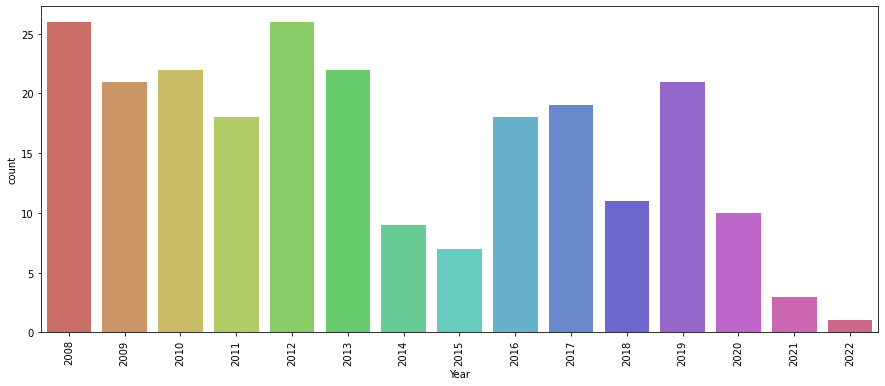

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot('Year', data=data, palette='hls')
plt.xticks(rotation = 90)
plt.show()

In [ ]:
data['InjuryLevel'].unique()


array(['None', 'Minor', 'Serious', 'Fatal', 'Unknown', nan], dtype=object)

In [ ]:
data['InjuryLevel'].value_counts()

None       79
Fatal      29
Serious    22
Minor      15
Unknown    11
Name: InjuryLevel, dtype: int64

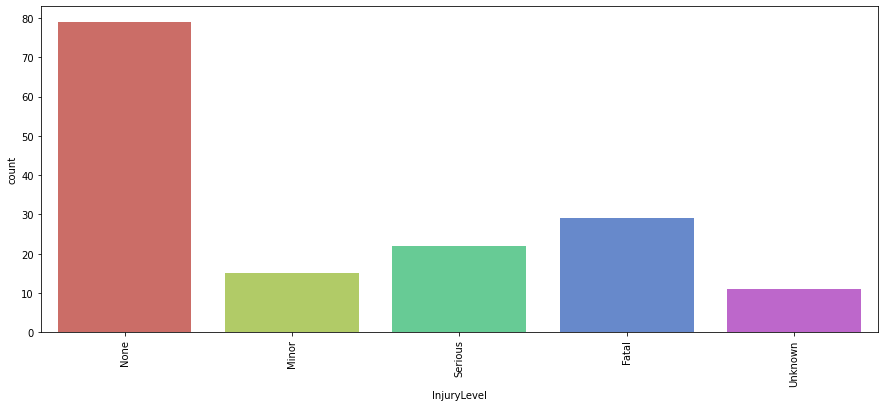

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot('InjuryLevel' , data=data, palette='hls')
plt.xticks(rotation = 90)
plt.show()

In [ ]:
data['FlightPhase'].unique()

array(['Landing', 'Taxi', 'En route', 'Take-off', 'Standing', 'Approach',
       'Unknown', nan, 'Initial Climb', 'Manoeuvring'], dtype=object)

In [ ]:
data['FlightPhase'].value_counts()

Landing          84
En route         32
Take-off         25
Taxi             21
Approach         21
Standing         10
Unknown           9
Initial Climb     1
Manoeuvring       1
Name: FlightPhase, dtype: int64

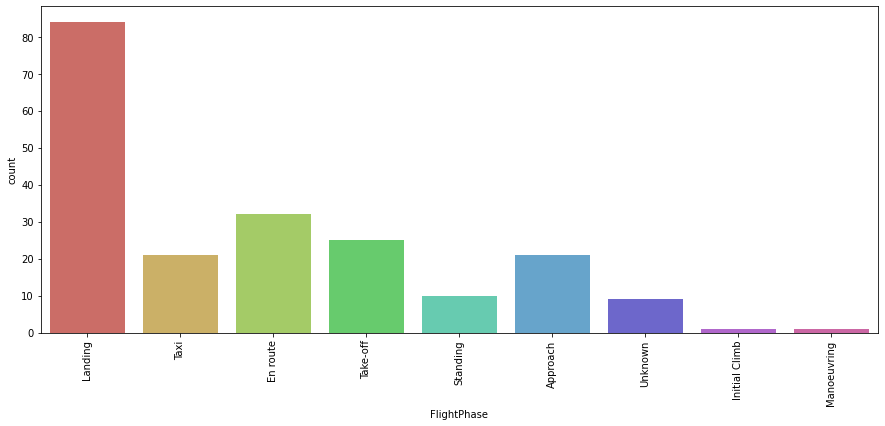

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot('FlightPhase' , data=data, palette='hls')
plt.xticks(rotation = 90)
plt.show()

In [ ]:
data_avg = []
for x in data['Year']:
 if x == 2008:
  avg = round((148 * 1000000)/ 26500000,2)
 elif x == 2009:
  avg = round((118 * 1000000)/ 25900000,2)
 elif x == 2010:
  avg = round((164 *1000000)/ 27800000,2)
 elif x == 2011:
  avg = round((132 *1000000)/ 30100000,2)
 elif x == 2012:
  avg = round((82 *1000000)/ 31200000,2)
 elif x == 2013:
  avg = round((117 * 1000000)/ 32000000,2)
 elif x == 2014:
  avg = round((118 * 1000000) / 33000000,2)
 elif x == 2015:
  avg = round((100 * 1000000)/ 340000000,2)
 elif x == 2016:
  avg = round((96 *1000000) / 35200000,2)
 elif x == 2017:
  avg = round((96 * 1000000) / 36400000,2)
 elif x == 2018:
  avg = round((115 * 1000000)/ 38100000,2)
 elif x == 2019:
  avg = round((116 * 1000000)/ 38900000,2)
 elif x == 2020:
  avg = round((77 * 1000000)/ 16900000,2)
 elif x == 2021:
  avg = round((17 * 1000000)/ 19300000,2)
 else:
  avg = round((11 * 1000000)/10750000,2)
 data_avg.append(avg)


In [ ]:
data_avg

[5.58,
 5.58,
 5.58,
 5.58,
 5.58,
 5.58,
 5.58,
 5.58,
 5.58,
 5.58,
 5.58,
 5.58,
 5.58,
 5.58,
 5.58,
 5.58,
 5.58,
 5.58,
 5.58,
 5.58,
 5.58,
 5.58,
 5.58,
 5.58,
 5.58,
 5.58,
 4.56,
 4.56,
 4.56,
 4.56,
 4.56,
 4.56,
 4.56,
 4.56,
 4.56,
 4.56,
 4.56,
 4.56,
 4.56,
 4.56,
 4.56,
 4.56,
 4.56,
 4.56,
 4.56,
 4.56,
 4.56,
 5.9,
 5.9,
 5.9,
 5.9,
 5.9,
 5.9,
 5.9,
 5.9,
 5.9,
 5.9,
 5.9,
 5.9,
 5.9,
 5.9,
 5.9,
 5.9,
 5.9,
 5.9,
 5.9,
 5.9,
 5.9,
 5.9,
 4.39,
 4.39,
 4.39,
 4.39,
 4.39,
 4.39,
 4.39,
 4.39,
 4.39,
 4.39,
 4.39,
 4.39,
 4.39,
 4.39,
 4.39,
 4.39,
 4.39,
 4.39,
 2.63,
 2.63,
 2.63,
 2.63,
 2.63,
 2.63,
 2.63,
 2.63,
 2.63,
 2.63,
 2.63,
 2.63,
 2.63,
 2.63,
 2.63,
 2.63,
 2.63,
 2.63,
 2.63,
 2.63,
 2.63,
 2.63,
 2.63,
 2.63,
 2.63,
 2.63,
 3.66,
 3.66,
 3.66,
 3.66,
 3.66,
 3.66,
 3.66,
 3.66,
 3.66,
 3.66,
 3.66,
 3.66,
 3.66,
 3.66,
 3.66,
 3.66,
 3.66,
 3.66,
 3.66,
 3.66,
 3.66,
 3.66,
 3.58,
 3.58,
 3.58,
 3.58,
 3.58,
 3.58,
 3.58,
 3.58,
 3.58,
 0.29,
 0.29,


In [ ]:
data['acc/1MillionFlights'] = data_avg


In [ ]:
data['InjuryLevel'].isnull().sum()

78

In [ ]:
data['InjuryLevel'].fillna('unknown',inplace=True)

In [ ]:
il_update = []
for x in data['InjuryLevel']:
 if x in ['Serious','Fatal']:
  x = 'Serious/Fatal'
 else:
  x = 'Minor/None'
 il_update.append(x)


In [ ]:
data['InjuryLevel'] = il_update

In [ ]:
data['InjuryLevel']=data['InjuryLevel'].apply(lambda x: 1 if x== 'Serious/Fatal' else 0)

In [ ]:
data['Serious/Fatal'] = data['InjuryLevel']


In [ ]:
data.drop(columns= ['InjuryLevel'], inplace=True)

In [ ]:
data.head()


,FlightPhase,Fatalities,Risk,Year,acc/1MillionFlights,Serious/Fatal
9,Landing,0.0,RS,2008,5.58,0
44,Landing,0.0,RS,2008,5.58,0
57,Taxi,0.0,RS,2008,5.58,0
64,En route,0.0,TURB,2008,5.58,1
71,En route,0.0,SCF,2008,5.58,0


In [ ]:
data.drop(columns=['Fatalities'],inplace=True)

In [ ]:
data['FlightPhase'].fillna('Unknown',inplace=True)

In [ ]:
data['FlightPhase'].isnull().sum()

0

In [ ]:
data['FlightPhase'].value_counts().head()

Landing     84
Unknown     39
En route    32
Take-off    25
Taxi        21
Name: FlightPhase, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

In [ ]:
labencoder = LabelEncoder()
labencoder.fit(data['FlightPhase'])

LabelEncoder()

In [ ]:
data['FlightPhase'] = labencoder.fit_transform(data['FlightPhase'])

In [ ]:
labencoder.classes_


array(['Approach', 'En route', 'Initial Climb', 'Landing', 'Manoeuvring',
       'Standing', 'Take-off', 'Taxi', 'Unknown'], dtype=object)

In [ ]:
labencoder = LabelEncoder()
labencoder.fit(data['Risk'])

LabelEncoder()

In [ ]:
data['Risk'] = labencoder.fit_transform(data['Risk'])

In [ ]:
col = ['Year','FlightPhase','Risk','Serious/Fatal','acc/1MillionFlights']

In [ ]:
data = data.loc[:,col]

In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 234 entries, 9 to 6086
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 234 non-null    int64  
 1   FlightPhase          234 non-null    int64  
 2   Risk                 234 non-null    int64  
 3   Serious/Fatal        234 non-null    int64  
 4   acc/1MillionFlights  234 non-null    float64
dtypes: float64(1), int64(4)
memory usage: 19.1 KB


In [ ]:
data.isnull().sum()


Year                   0
FlightPhase            0
Risk                   0
Serious/Fatal          0
acc/1MillionFlights    0
dtype: int64

In [ ]:
X = data.drop(columns=['Serious/Fatal'])
y = data['Serious/Fatal']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
X_train.shape

(187, 4)

In [ ]:
y_train.shape

(187,)

In [ ]:
X_train.head()


,Year,FlightPhase,Risk,acc/1MillionFlights
3328,2013,7,15,3.66
4338,2016,3,15,2.73
4121,2015,7,15,0.29
4539,2016,1,10,2.73
6015,2021,6,15,0.88


In [ ]:
y_train

3328    0
4338    0
4121    0
4539    1
6015    0
       ..
3174    0
460     1
3027    0
4873    0
3116    1
Name: Serious/Fatal, Length: 187, dtype: int64

In [ ]:
st_x= StandardScaler()
x_train= st_x.fit_transform(X_train)
x_test= st_x.transform(X_test) 


In [ ]:
classifier= LogisticRegression(random_state=0)
classifier.fit(x_train, y_train) 

LogisticRegression(random_state=0)

In [ ]:
y_pred = classifier.predict(x_test)

In [ ]:
print(classifier.score(x_train, y_train))

0.7967914438502673


In [ ]:
print(classifier.score(x_test, y_test))

0.8723404255319149


In [ ]:
print(classifier.score(x_test, y_pred))


1.0


In [ ]:
cm= confusion_matrix(y_test, y_pred) 

In [ ]:
print(cm)


[[40  2]
 [ 4  1]]


In [ ]:
classifier_dt= DecisionTreeClassifier(criterion='entropy', random_state=0)
classifier_dt.fit(x_train, y_train) 

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
y_pred= classifier_dt.predict(x_test) 

In [ ]:
print(classifier_dt.score(x_train, y_train))

0.946524064171123


In [ ]:
print(classifier_dt.score(x_test, y_test))

0.8936170212765957


In [ ]:
print(classifier_dt.score(x_test, y_pred))

1.0


In [ ]:
cm= confusion_matrix(y_test, y_pred) 

In [ ]:
print(cm)

[[40  2]
 [ 3  2]]
